## 2. LDA Stages:
#### Compute $d$-dimensional mean vectors for each classes, where d is the dimension of features space. 
#### Compute the In-Between class Scatter Matrix $SW$ 
#### Compute the With-In class Scatter Matrix $SB$. 
#### Compute eigen vectors and corresponding eigen values of the matrix ($SW^{-1} \times SB$). 
#### Choose $k$ eigen vectors corresponding to the $k$-th largest eigen values to form a transformation matrix of dimension $d \times k$. 
#### Transform the $d$-dimensional feature space $X$ to $k$-dimensional feature space via the transformation matrix. 

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn import datasets

### Importing dataset

In [2]:
# Import IRIS dataset available within sklearn
iris_data = datasets.load_iris()
# Load Features and Target vectors X[Feature Matrix] and y[Target Vector]
X, y = np.array(iris_data.data), np.array(iris_data.target)

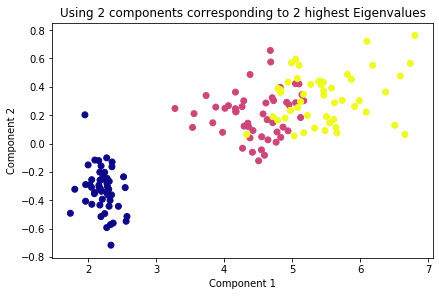

In [12]:
# Compute Mean for each unique target value(here 0,1,2) {classwise mean} 
x_mean = []
for i in np.unique(y):
    x_mean.append(np.mean(X[np.where(y == i)], axis=0))
x_mean = np.array(x_mean)  # cast list to np.array

# Compute SW: Within-Class Scatter Matrix 
SW = np.zeros((X.shape[1], X.shape[1]))      # Square Matrix of dimension (means 4x4)
for i in np.unique(y): 
    L = X[np.where(y==i)] - x_mean[i,:] 
    SW += np.dot(L.T, L)
print('Within-class Scatter Matrix(SW):\n {}\n'.format(SW))

# Compute SB: InBetween-Class Scatter Matrix
SB = np.zeros((X.shape[1], X.shape[1]))
X_overall_mean = np.mean(X, axis=0)
for i in np.unique(y):
    X_overall_mean = X_overall_mean.reshape((4,1))
    X_mean_class = x_mean[i].reshape((4,1))
    n = X[np.where(y == i)].shape[0]
    SB += n * np.dot((X_mean_class - X_overall_mean), (X_mean_class - X_overall_mean).T)
#print('Between-class Scatter Matrix(SB):\n{}\n'.format(SB))

# Compute Eigenvalues and the corresponding Eigenvectors 
e_vals, e_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))
e_vals = e_vals.reshape((4,1))
#print("Eigenvalues: \n{}".format(e_vals))
#print("Eigenvectors: \n{}\n".format(e_vecs))

# Considering the 2 first Eigen-ectors corresponding to 2 largest Eigenvalues (means using 2 LDA)
E2 = e_vecs[0:2,:]

# Project X(original data) on 2D
X_project_2d = np.dot(E2, X.T).T

# Plot projection in 2D 
fig, axs = plt.subplots(1, 1, constrained_layout=True)
axs.scatter(X_project_2d[:,0], X_project_2d[:,1], c=y, cmap ='plasma')
axs.set_xlabel('Component 1')
axs.set_ylabel('Component 2')
axs.set_title('Using 2 components corresponding to 2 highest Eigenvalues')
plt.show()



### Checking accuracy using Naive Bayes Classifier 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [22]:
# Classification in reduced dimension(from 4D to 2D) using NaiveBayes Classifier
X_train_PC2, X_test_PC2, Y_train, Y_test = train_test_split(X_project_2d, y, test_size=0.3)
model = GaussianNB()
model.fit(X_train_PC2, Y_train)
Y_predict = model.predict(X_test_PC2)
accuracy = accuracy_score(Y_test, Y_predict)

print("LDA accuracy two components: {:05.2f} %".format(accuracy * 100))


LDA accuracy two components: 91.11 %
